In [1]:
## Read Data and import packages
import pandas as pd
%matplotlib inline 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
#from pdpbox import pdp, info_plots 
data = pd.read_csv("/home/Navneet/British_telecom/Case Study 1/Classification of Patients with Abnormal Blood Pressure (N=2000)/Training Data.csv")
# Drop ID type Column
data.drop("Patient_Number",axis=1,inplace=True)
print(data.shape)
data.head()

(2000, 14)


,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


### Filling Missing Values

In [2]:
data.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

Pregnancy

In [3]:
data[data["Pregnancy"].isnull()].Sex.value_counts()

0    1008
1     550
Name: Sex, dtype: int64

In [4]:
data[data["Pregnancy"] == data["Pregnancy"].iloc[0]].Sex.value_counts()

1    199
Name: Sex, dtype: int64

In [5]:
data["Pregnancy"] = data["Pregnancy"].fillna(0)

Alcohol_consumption_per_day

for -0 249.73310023310023
for -1 252.22444444444446


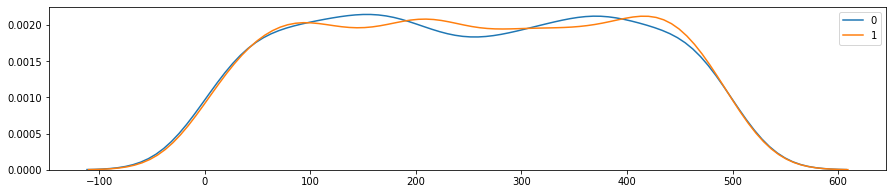

In [6]:
plt.figure(figsize=(15,3))
for a,b in (data.groupby("Smoking")):
    sns.kdeplot(b["alcohol_consumption_per_day"].dropna(), label = a)
    print("for -"+str(a),b["alcohol_consumption_per_day"].dropna().mean())
    #break

In [7]:
data["alcohol_consumption_per_day"] = data["alcohol_consumption_per_day"].fillna(data["alcohol_consumption_per_day"].mean())

Genetic_Pedigree_Coefficient

In [8]:
data["Genetic_Pedigree_Coefficient"] = data["Genetic_Pedigree_Coefficient"].fillna(data["Genetic_Pedigree_Coefficient"].mean())
data.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

### Level_of_Hemoglobin, Genetic_Pedigree_Coefficient and Blood_Pressure_Abnormality

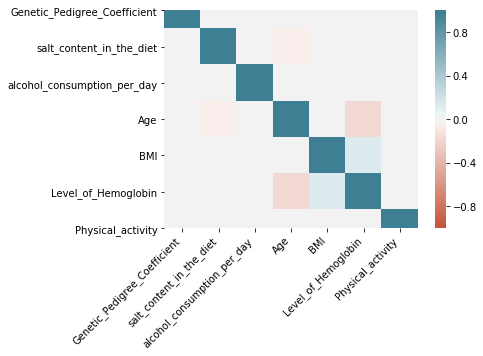

In [9]:
categorical_like = ["Sex","Pregnancy","Smoking","Chronic_kidney_disease","Adrenal_and_thyroid_disorders"]
label = ["Blood_Pressure_Abnormality"]
Ordinal = ["Level_of_Stress"]

corr = data[list(set(list(data.columns)).difference(categorical_like+label+Ordinal))].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

A balanced DataSet

In [10]:
data.Blood_Pressure_Abnormality.value_counts(normalize=True)

0    0.5065
1    0.4935
Name: Blood_Pressure_Abnormality, dtype: float64

In [11]:
# Correct Data Type
categorical_like = ["Sex","Pregnancy","Smoking","Chronic_kidney_disease","Adrenal_and_thyroid_disorders"]
label = ["Blood_Pressure_Abnormality"]
Ordinal = ["Level_of_Stress"]
Blood_Pressure_Abnormality_mapper = {"1":"Abnormal","0": "Normal"}
sex_mapper = {"1":"Female","0": "Male"}
pregnancy_mapper = {"1":"Yes","0": "No"}
#smoking_mapper = {"1":"Yes","0": "No"}
level_of_stress_mapper = {"1":"Less","2": "Normal","3":"High"}
#Nominal = [Sex, Pregnancy, Smoking, Chronic_kidney_disease, Adrenal_and_thyroid_disorders]
for col in categorical_like:
    data[col] = data[col].astype(object)
    
data_map = data.copy()
data_map['Blood_Pressure_Abnormality'] = data_map['Blood_Pressure_Abnormality'].astype(str).map(Blood_Pressure_Abnormality_mapper)
data_map['Sex'] = data_map['Sex'].astype(str).map(sex_mapper)
#data_map['Pregnancy'] = data_map['Pregnancy'].astype(str).map(pregnancy_mapper)
data_map['Smoking'] = data_map['Smoking'].astype(str).map(pregnancy_mapper)
data_map['Level_of_Stress'] = data_map['Level_of_Stress'].astype(str).map(level_of_stress_mapper)
data_map['Chronic_kidney_disease'] = data_map['Chronic_kidney_disease'].astype(str).map(pregnancy_mapper)
data_map['Adrenal_and_thyroid_disorders'] = data_map['Adrenal_and_thyroid_disorders'].astype(str).map(pregnancy_mapper)
#data_map.head(2)

### PDF for  Level_of_Hemoglobin and Genetic_Pedigree_Coefficient

We notice the diffrence in Abnormal Blood Pressure an Normal blood probability distribution 
for both 
1. Level_of_Hemoglobin
2. Genetic_Pedigree_Coefficient

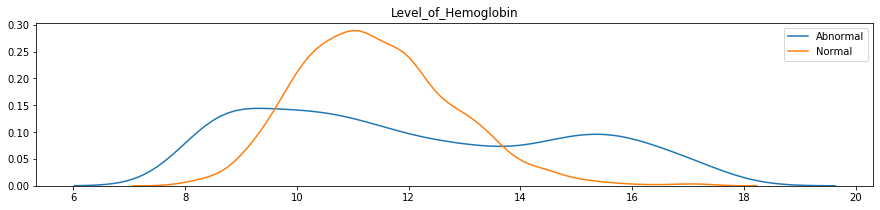

In [12]:
plt.figure(figsize=(15,3))
plt.title("Level_of_Hemoglobin")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Abnormal"].Level_of_Hemoglobin, label = "Abnormal")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Normal"].Level_of_Hemoglobin,label = "Normal")

0.0 1.0
(2000, 14)


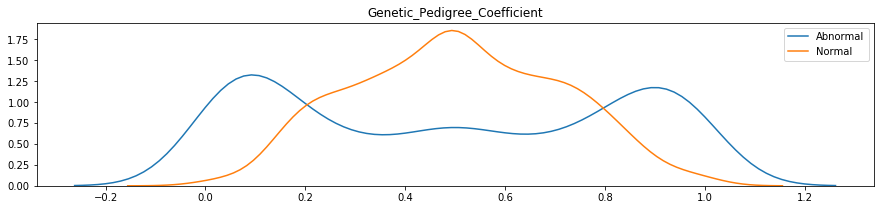

In [13]:
plt.figure(figsize=(15,3))
plt.title("Genetic_Pedigree_Coefficient")
data_map_ = data_map[data_map["Genetic_Pedigree_Coefficient"] != -999]
print(data_map_["Genetic_Pedigree_Coefficient"].min(),data_map_["Genetic_Pedigree_Coefficient"].max())
print(data_map_.shape)
#data_map["Genetic_Pedigree_Coefficient"].fillna(data_map["Genetic_Pedigree_Coefficient"].m()
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Abnormal"].Genetic_Pedigree_Coefficient, label = "Abnormal")
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Normal"].Genetic_Pedigree_Coefficient,label = "Normal")

### Scatter Plot 

From the Scatter Plot we can conclude that 
1. linear Classifier without any feature engineering wont be able to draw a good decision bounadry 
2. Non Linear Classifiers like Decision Tree, Random Forest, kernel SVM should work better 

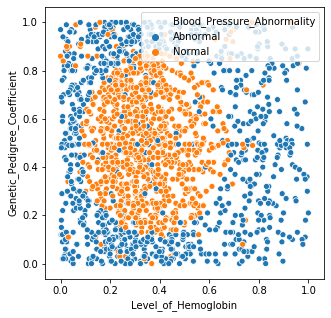

In [14]:
plt.figure(figsize=(5,5))
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = data_map_[['Level_of_Hemoglobin']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = data_map_.copy()
df_normalized["Level_of_Hemoglobin"] = (x_scaled)



sns.scatterplot(x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient",
                hue="Blood_Pressure_Abnormality",data=df_normalized[:1900])
plt.show()
# plt.figure(figsize=(5,5))
# sns.scatterplot(x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient",
#                 hue="Blood_Pressure_Abnormality",data=df_normalized[1900:])
# plt.show()

# plt.figure(figsize=(5,5))
# sns.scatterplot(x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient",
#                 hue="Blood_Pressure_Abnormality",data=data_train_classified)
# plt.show()

# plt.figure(figsize=(5,5))
# sns.scatterplot(x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient",
#                 hue="Blood_Pressure_Abnormality",data=data_train_missclassified)
# plt.show()

## Model building

1. Scaling 
2. train-Test Split

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_sample_weight


df = pd.get_dummies(data[['Level_of_Hemoglobin',"Genetic_Pedigree_Coefficient","Blood_Pressure_Abnormality"]].drop(label,axis=1))
x = df[['Level_of_Hemoglobin']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = df.copy()
df["Level_of_Hemoglobin"] = (x_scaled)

y = data[label]
a = len(data) - 100
X_train, X_test, y_train, y_test = df.iloc[:a],df.iloc[a:],y.iloc[:a],y.iloc[a:]
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



# clf = RandomForestClassifier(n_jobs=-1, bootstrap = True,max_depth =  8,max_features = 2, min_samples_leaf =  3,min_samples_split = 10,n_estimators = 200)
# clf.fit(X_train, y_train)
# preds = clf.predict_proba(X_train)[:,1]
# #pd.DataFrame({"Label":y, "Pred": preds })
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, preds)
# print ("Train AUC",auc(false_positive_rate, true_positive_rate))
# print ("Accuracy", accuracy_score(y_train, clf.predict(X_train)))
# #

# preds = clf.predict_proba(X_test)[:,1]
# #pd.DataFrame({"Label":y, "Pred": preds })
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
# print ("Test AUC", auc(false_positive_rate, true_positive_rate))
# print ("Accuracy",accuracy_score(y_test, clf.predict(X_test)))

(1900, 2) (1900, 1)
(100, 2) (100, 1)
CPU times: user 58.1 ms, sys: 7.65 ms, total: 65.8 ms
Wall time: 64.9 ms


Models

1. "Logistic Regression"
2. "Nearest Neighbors"
3. "RBF SVM"
4. "Gaussian Process"
5. "Decision Tree"
6. "Random Forest"


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
h = .02  # step size in the mesh

names = ["Logistic Regression","Nearest Neighbors", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest"]

classifiers = [LogisticRegression(),
    KNeighborsClassifier(5),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
a_dict = {}
for name,clf in zip(names,classifiers):
    #print(name)
    clf.fit(X_train, y_train)
    #preds = clf.predict_proba(X_train)[:,1]
    #pd.DataFrame({"Label":y, "Pred": preds })
    from sklearn.metrics import roc_curve, auc, roc_auc_score
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, clf.predict_proba(X_train))
#     print ("Train AUC",auc(false_positive_rate, true_positive_rate))
    #print ("Accuracy Train", accuracy_score(y_train, clf.predict(X_train)))
    #

    #pd.DataFrame({"Label":y, "Pred": preds })
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    #print ("Accuracy Test",accuracy_score(y_test, clf.predict(X_test)))
    a_dict[name] = [accuracy_score(y_train, clf.predict(X_train)),accuracy_score(y_test, clf.predict(X_test))]
    #print("##########")
classifier_frame = pd.DataFrame(a_dict, index= ["Train","Test"]).T.sort_values(ascending =False, by="Test")

/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [17]:
classifier_frame

,Train,Test
RBF SVM,0.908947,0.92
Nearest Neighbors,0.920526,0.91
Gaussian Process,0.920000,0.91
Random Forest,0.888421,0.88
Decision Tree,0.891579,0.87
Logistic Regression,0.558421,0.58


As Expected Logistic Regression Performs the worst.

In [18]:
# #clf.fit(X_train,y_train)
# data_train_missclassified = X_train[clf.predict(X_train) != y_train.Blood_Pressure_Abnormality]
# data_train_missclassified = pd.concat([data_train_missclassified,y_train[clf.predict(X_train) != y_train.Blood_Pressure_Abnormality].Blood_Pressure_Abnormality],axis=1)

# data_train_classified = X_train[clf.predict(X_train) == y_train.Blood_Pressure_Abnormality]
# data_train_classified = pd.concat([data_train_classified,y_train[clf.predict(X_train) == y_train.Blood_Pressure_Abnormality].Blood_Pressure_Abnormality],axis=1)


# #clf.fit(X_train,y_train)
# data_test_missclassified = X_test[clf.predict(X_test) != y_test.Blood_Pressure_Abnormality]
# data_test_missclassified = pd.concat([data_test_missclassified,y_test[clf.predict(X_test) != y_test.Blood_Pressure_Abnormality].Blood_Pressure_Abnormality],axis=1)

# data_test_classified = X_test[clf.predict(X_test) == y_test.Blood_Pressure_Abnormality]
# data_train_classified = pd.concat([data_test_classified,y_test[clf.predict(X_test) == y_test.Blood_Pressure_Abnormality].Blood_Pressure_Abnormality],axis=1)


Let's look at the decison boundaries of different classifiers
1. GaussianProcess Classifier
2. K Neighbour Classifier
3. Support Vector 
4. Voting Classifier

In [19]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianProcessClassifier(1.0 * RBF(1.0))
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(gamma=2, C=1,probability= True)
eclf = VotingClassifier(estimators=[('gauss', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
eclf.fit(X_train, y_train)


/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/root/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

VotingClassifier(estimators=[('gauss',
                              GaussianProcessClassifier(copy_X_train=True,
                                                        kernel=1**2 * RBF(length_scale=1),
                                                        max_iter_predict=100,
                                                        multi_class='one_vs_rest',
                                                        n_jobs=None,
                                                        n_restarts_optimizer=0,
                                                        optimizer='fmin_l_bfgs_b',
                                                        random_state=None,
                                                        warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
         

In [20]:
for cl in [clf1, clf2, clf3, eclf]:
    #print(cl)
    print ("Train Accuracy",accuracy_score(y_train, cl.predict(X_train)))
    print ("Test Accuracy",accuracy_score(y_test, cl.predict(X_test)))
    print("#")
pred_train = clf3.predict_proba(X_train)
pred_test = clf3.predict_proba(X_test)

Train Accuracy 0.92
Test Accuracy 0.91
#
Train Accuracy 0.9205263157894736
Test Accuracy 0.91
#
Train Accuracy 0.9089473684210526
Test Accuracy 0.92
#
Train Accuracy 0.9231578947368421
Test Accuracy 0.91
#


<Figure size 1728x864 with 0 Axes>

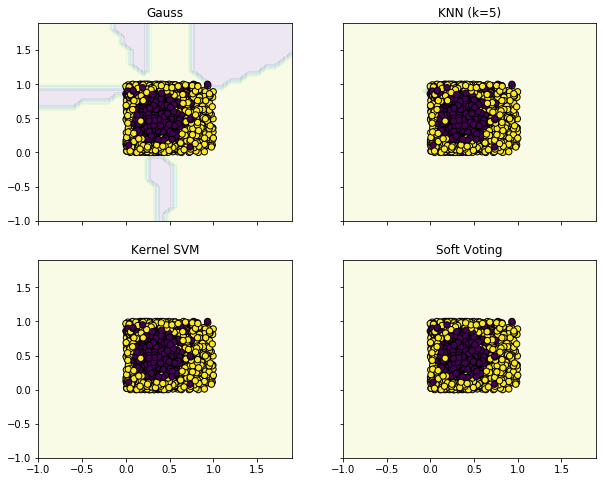

In [21]:
from itertools import product
plt.figure(figsize=(24,12))
# Plotting decision regions
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Gauss', 'KNN (k=5)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.1)
    axarr[idx[0], idx[1]].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.Blood_Pressure_Abnormality.values,
                                  s=40, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Finally, We settle for K-Nearest Neighbour and Grid Search for K

In [22]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
k_range = list(range(1, 6))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
grid.best_params_

{'n_neighbors': 5}

Use the hyper-parameter from Grid Search and plot Precision Recall Curve and Confusion Matrix

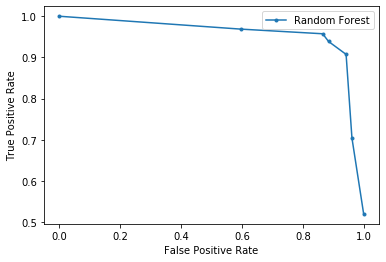

In [33]:
clf = KNeighborsClassifier(grid.best_params_["n_neighbors"])
clf.fit(X_train,y_train)
preds = clf.predict_proba(X_train)[:,1]
#pd.DataFrame({"Label":y, "Pred": preds })
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, preds)
# print ("Train AUC",auc(false_positive_rate, true_positive_rate))
# print ("Accuracy", accuracy_score(y_train, clf.predict(X_train)))
# #

preds = clf.predict_proba(X_test)[:,1]
#pd.DataFrame({"Label":y, "Pred": preds })
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
# print ("Test AUC", auc(false_positive_rate, true_positive_rate))
# print ("Accuracy",accuracy_score(y_test, clf.predict(X_test)))

%matplotlib inline
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
preds = clf.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test,preds)
#ns_fpr, ns_tpr, _ = precision_recall_curve(y_test, finalpred[:,1])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

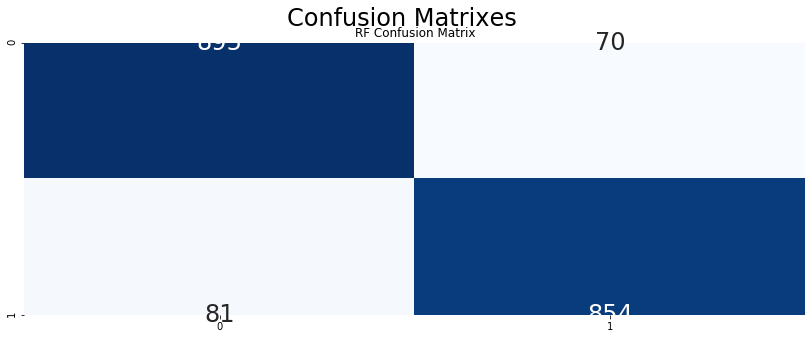

In [34]:
plt.figure(figsize=(14,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_train, clf.predict(X_train))
plt.title("RF Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

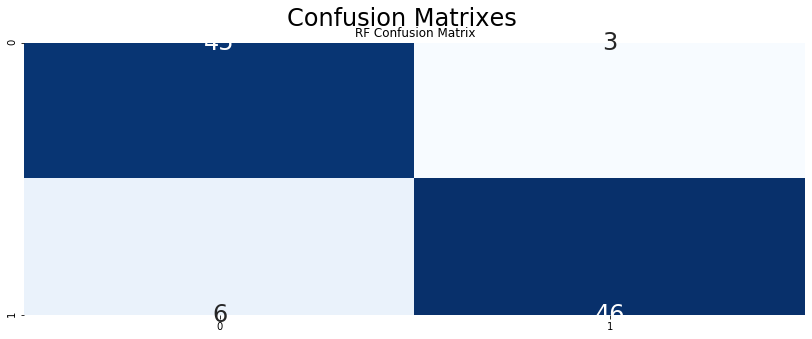

In [35]:
plt.figure(figsize=(14,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, clf.predict(X_test))
plt.title("RF Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [37]:
data_train_missclassified = X_train[clf.predict(X_train) != y_train.Blood_Pressure_Abnormality]
data_train_classified = X_train[clf.predict(X_train) == y_train.Blood_Pressure_Abnormality]
#data_train_missclassified.head(2)
print("shape of Correctlty and incorrectly Classified in Train")
print(data_train_classified.shape,data_train_missclassified.shape)

shape of Correctlty and incorrectly Classified in Train
(1749, 2) (151, 2)


Let's compare the probability distribution of Correctlty and incorrectly Classified in Train

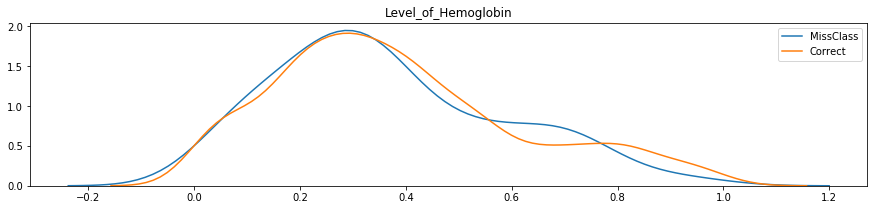

In [29]:
plt.figure(figsize=(15,3))
plt.title("Level_of_Hemoglobin")
sns.kdeplot(data_train_missclassified.Level_of_Hemoglobin, label = "MissClass")
#plt.show()
#plt.figure(figsize=(15,3))
sns.kdeplot(data_train_classified.Level_of_Hemoglobin,label = "Correct")
plt.show()

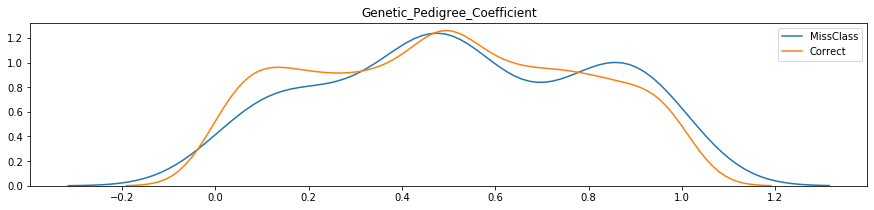

In [30]:
plt.figure(figsize=(15,3))
plt.title("Genetic_Pedigree_Coefficient")
sns.kdeplot(data_train_missclassified[data_train_missclassified.Genetic_Pedigree_Coefficient !=-999].Genetic_Pedigree_Coefficient, label = "MissClass")
sns.kdeplot(data_train_classified[data_train_classified.Genetic_Pedigree_Coefficient !=-999].Genetic_Pedigree_Coefficient, label = "Correct")
#sns.kdeplot(data_train_classified.Genetic_Pedigree_Coefficient,label = "Correct")

Our Model finds it difficult to draw a boundary when Level_of_Hemoglobin is in range(0.6,0.8) and 
when Genetic_Pedigree_Coefficient is in range(0.8,1.0)

## Let's Now check if adding Smoking, obesity (BMI), Lack of physical activity, salt content in the diet, alcohol consumption per day, Level of Stress, Age, Sex, Pregnancy, Chronic kidney disease and Adrenal & thyroid disorders help us reducing the error.

### EDA on Rest of the Features

(2000, 14)


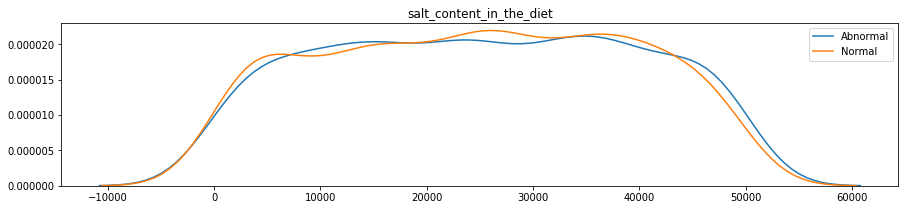

In [38]:
plt.figure(figsize=(15,3))
plt.title("salt_content_in_the_diet")
data_map_ = data_map.dropna(subset= ["salt_content_in_the_diet"],axis=0)
print(data_map_.shape)
#data_map["Genetic_Pedigree_Coefficient"].fillna(data_map["Genetic_Pedigree_Coefficient"].m()
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Abnormal"].salt_content_in_the_diet, label = "Abnormal")
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Normal"].salt_content_in_the_diet,label = "Normal")

(2000, 14)


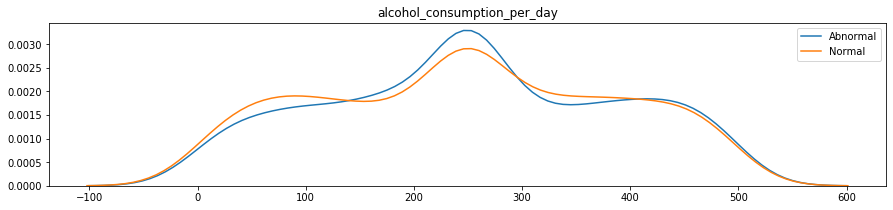

In [39]:
plt.figure(figsize=(15,3))
plt.title("alcohol_consumption_per_day")
data_map_ = data_map.dropna(subset= ["alcohol_consumption_per_day"],axis=0)
print(data_map_.shape)
#data_map["Genetic_Pedigree_Coefficient"].fillna(data_map["Genetic_Pedigree_Coefficient"].m()
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Abnormal"].alcohol_consumption_per_day, label = "Abnormal")
sns.kdeplot(data_map_[data_map_["Blood_Pressure_Abnormality"] == "Normal"].alcohol_consumption_per_day,label = "Normal")

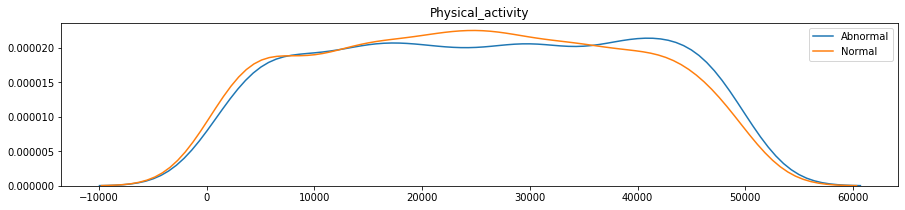

In [40]:
plt.figure(figsize=(15,3))
plt.title("Physical_activity")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Abnormal"].Physical_activity, label = "Abnormal")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Normal"].Physical_activity,label = "Normal")

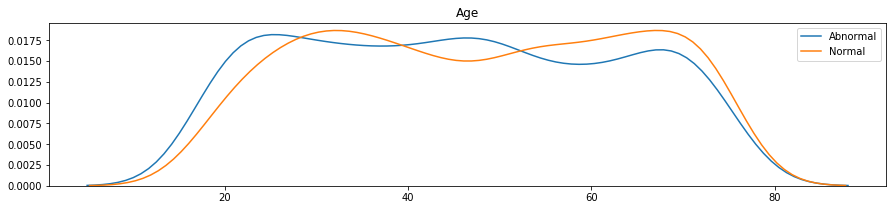

In [41]:
plt.figure(figsize=(15,3))
plt.title("Age")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Abnormal"].Age, label = "Abnormal")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Normal"].Age,label = "Normal")

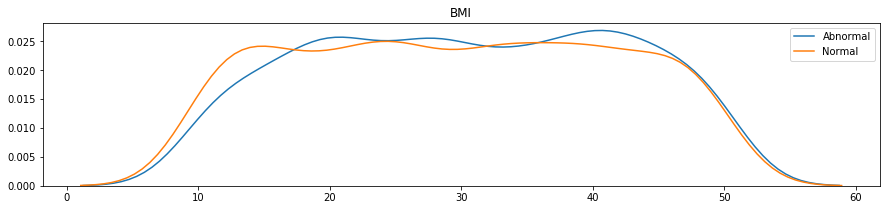

In [42]:
plt.figure(figsize=(15,3))
plt.title("BMI")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Abnormal"].BMI,label = "Abnormal")
sns.kdeplot(data_map[data_map["Blood_Pressure_Abnormality"] == "Normal"].BMI,label = "Normal")

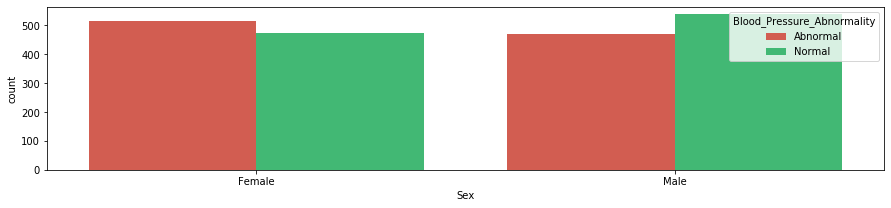

In [43]:
plt.figure(figsize=(15,3))
sns.countplot(x="Sex", hue="Blood_Pressure_Abnormality", data=data_map, palette=["#e74c3c", "#2ecc71"])

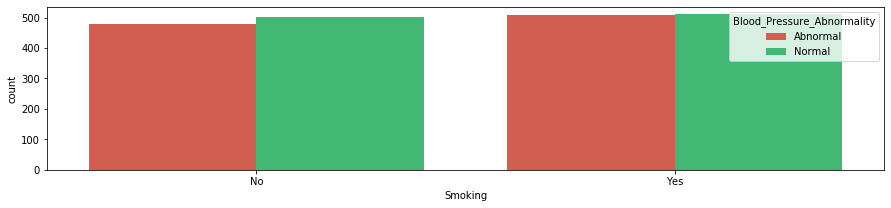

In [44]:
plt.figure(figsize=(15,3))
sns.countplot(x="Smoking", hue="Blood_Pressure_Abnormality", data=data_map, palette=["#e74c3c", "#2ecc71"])

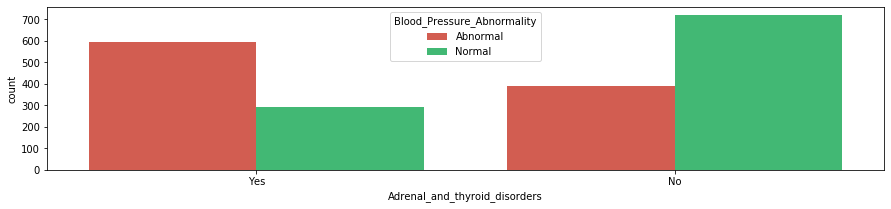

In [45]:
plt.figure(figsize=(15,3))
sns.countplot(x="Adrenal_and_thyroid_disorders", hue="Blood_Pressure_Abnormality", data=data_map, palette=["#e74c3c", "#2ecc71"])

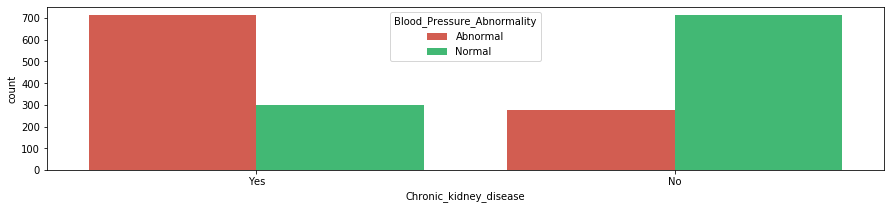

In [46]:
plt.figure(figsize=(15,3))
sns.countplot(x="Chronic_kidney_disease", hue="Blood_Pressure_Abnormality", data=data_map, palette=["#e74c3c", "#2ecc71"])

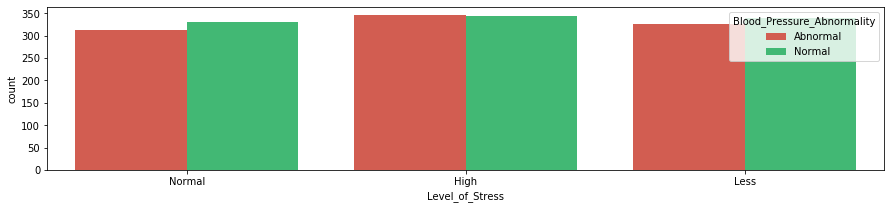

In [47]:
plt.figure(figsize=(15,3))
sns.countplot(x="Level_of_Stress", hue="Blood_Pressure_Abnormality", data=data_map, palette=["#e74c3c", "#2ecc71"])

From the EDA We can see that Adrenal_and_thyroid_disorders and Chronic_kidney_disease are the variables that can
add some information to our model

Let's continually add these extra features one by one and then drop it, and check train-test accuracy

In [48]:
list_to_drop = ['Level_of_Hemoglobin',"Genetic_Pedigree_Coefficient","Blood_Pressure_Abnormality"]
col_list = data.drop(list_to_drop,axis=1).columns
#x = data[['Level_of_Hemoglobin']].values.astype(float)
#df = pd.get_dummies(data.drop(list_to_drop,axis=1))
col_list
a_dict_feature = {}
for col in col_list:
    #print(col)
    df = pd.get_dummies(data[['Level_of_Hemoglobin',"Genetic_Pedigree_Coefficient","Blood_Pressure_Abnormality",col]].drop(label,axis=1))
    x = df[['Level_of_Hemoglobin']].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    #df_normalized = df.copy()
    df["Level_of_Hemoglobin"] = (x_scaled)

    y = data[label]
    a = len(data) - 100
    X_train, X_test, y_train, y_test = df.iloc[:a],df.iloc[a:],y.iloc[:a],y.iloc[a:]
    clf_check = RandomForestClassifier(max_depth=6, n_estimators=300, max_features="auto")
    clf_check.fit(X_train,y_train)
    #print ("Train Accuracy",accuracy_score(y_train, clf_check.predict(X_train)))
    #print ("Test Accuracy",accuracy_score(y_test, clf_check.predict(X_test)))
    a_dict_feature[col] = [accuracy_score(y_train, clf_check.predict(X_train)),accuracy_score(y_test, clf_check.predict(X_test))]
classifier_frame = pd.DataFrame(a_dict_feature, index= ["Train","Test"]).T.sort_values(ascending =False, by="Test")
classifier_frame

,Train,Test
alcohol_consumption_per_day,0.899474,0.92
Sex,0.903684,0.91
Pregnancy,0.907368,0.91
Smoking,0.904211,0.91
salt_content_in_the_diet,0.897368,0.91
Level_of_Stress,0.898421,0.90
Chronic_kidney_disease,0.912105,0.90
Adrenal_and_thyroid_disorders,0.913158,0.90
Age,0.901579,0.89
BMI,0.903684,0.89


Let's continually add these extra features one by one, and check train-test accuracy

In [51]:
list_to_drop = ['Level_of_Hemoglobin',"Genetic_Pedigree_Coefficient","Blood_Pressure_Abnormality"]
col_list = list(data.drop(list_to_drop,axis=1).columns)[::-1]
#x = data[['Level_of_Hemoglobin']].values.astype(float)
#df = pd.get_dummies(data.drop(list_to_drop,axis=1))
col_list_append = ['Level_of_Hemoglobin',"Genetic_Pedigree_Coefficient","Blood_Pressure_Abnormality"]
a_dict_feature_2 = {}
for col in col_list:
    #print(col)
    col_list_append.append(col)
    df = pd.get_dummies(data[col_list_append]).drop(label,axis=1)
    x = df[['Level_of_Hemoglobin']].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    #df_normalized = df.copy()
    df["Level_of_Hemoglobin"] = (x_scaled)

    y = data[label]
    a = len(data) - 100
    X_train, X_test, y_train, y_test = df.iloc[:a],df.iloc[a:],y.iloc[:a],y.iloc[a:]
    clf_check = RandomForestClassifier(max_depth=6, n_estimators=300, max_features="auto")
    clf_check.fit(X_train,y_train)
    #print ("Train Accuracy",accuracy_score(y_train, clf_check.predict(X_train)))
    #print ("Test Accuracy",accuracy_score(y_test, clf_check.predict(X_test)))
    a_dict_feature_2[col] = [accuracy_score(y_train, clf_check.predict(X_train)),accuracy_score(y_test, clf_check.predict(X_test))]
classifier_frame = pd.DataFrame(a_dict_feature_2, index= ["Train","Test"]).T
classifier_frame

,Train,Test
Adrenal_and_thyroid_disorders,0.913684,0.89
Chronic_kidney_disease,0.907368,0.91
Level_of_Stress,0.894211,0.89
alcohol_consumption_per_day,0.893158,0.89
salt_content_in_the_diet,0.896316,0.89
Physical_activity,0.892105,0.89
Smoking,0.891053,0.88
Pregnancy,0.891579,0.89
Sex,0.892632,0.88
BMI,0.892105,0.89


## Running With All features 

In [44]:
# create training and testing vars
from sklearn.model_selection import train_test_split
#data = data.sample(frac=1)
df = pd.get_dummies(data.drop(label,axis=1))
y = data[label]
a = len(data) - 100
X_train, X_test, y_train, y_test = df.iloc[:a],df.iloc[a:],y.iloc[:a],y.iloc[a:]
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)




(1900, 18) (1900, 1)
(100, 18) (100, 1)


In [63]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_sample_weight
# xdxd = data_[data_["event_time"] <"2019-01-14 00:00:00"]
# aaa = dict(xdxd["rptcatg"].value_counts(normalize = True))
# aaa['Salon at Home'] = 1000*aaa['Salon at Home']

# xcxc= compute_sample_weight(class_weight=aaa, y=xdxd["rptcatg"])


#xcxc= compute_sample_weight(dict(y_train.value_counts().rdiv(1)), y_train)
clf = RandomForestClassifier(n_jobs=-1, random_state=0,max_depth=7,max_features=3,min_samples_leaf = 4,
 min_samples_split = 12,n_estimators = 100)
clf.fit(X_train, y_train)




preds = clf.predict_proba(X_train)[:,1]
#pd.DataFrame({"Label":y, "Pred": preds })
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, preds)
print ("Train AUC",auc(false_positive_rate, true_positive_rate))
print ("Accuracy", accuracy_score(y_train, clf.predict(X_train)))
#

preds = clf.predict_proba(X_test)[:,1]
#pd.DataFrame({"Label":y, "Pred": preds })
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
print ("Test AUC", auc(false_positive_rate, true_positive_rate))
print ("Accuracy",accuracy_score(y_test, clf.predict(X_test)))

Train AUC 0.9581912388130005
Accuracy 0.8926315789473684
Test AUC 0.9427083333333334
Accuracy 0.89
CPU times: user 570 ms, sys: 126 ms, total: 696 ms
Wall time: 804 ms


In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [7,8, 9, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   17.3s finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

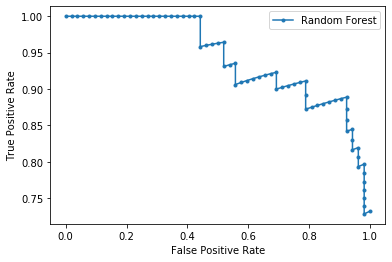

In [64]:
%matplotlib inline
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
preds = clf.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test,preds)
#ns_fpr, ns_tpr, _ = precision_recall_curve(y_test, finalpred[:,1])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

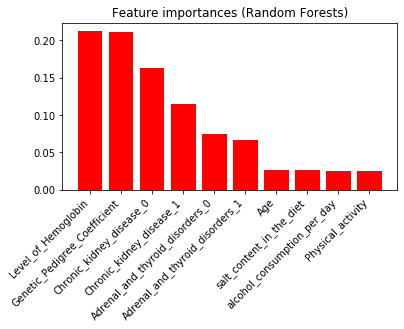

In [65]:
coefs = clf.feature_importances_
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forests)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); plt.show()

Adding New features Doesn't Seem to help in anyway. Let's Now check if Advanced Model Building Technique
like Ensembling Hetregenous Models and Stacking improves our result or not

### Ensemble of Logistic, GaussianNB ,and Random Forest

The underlying assumption is that Logistic Regression would capture Linear relationship
and RF would capture Non_linear relationship

In [66]:
from sklearn.linear_model import LogisticRegression
import numpy as np
logisticRegr = GaussianNB()
logisticRegr.fit(X_train, y_train)
preds_lr = logisticRegr.predict_proba(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, preds_lr[:,1])
print ("Accuracy", accuracy_score(y_train, logisticRegr.predict(X_train)))

preds_lr = logisticRegr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds_lr[:,1])
print ("Accuracy", accuracy_score(y_test, logisticRegr.predict(X_test)))

Accuracy 0.7278947368421053
Accuracy 0.75


In [67]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.naive_bayes import GaussianNB
model3 = LogisticRegression()

model3.fit(X_train, y_train)
preds_lr = model3.predict_proba(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, preds_lr[:,1])
print ("Accuracy", accuracy_score(y_train, model3.predict(X_train)))

preds_lr = model3.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds_lr[:,1])
print ("Accuracy", accuracy_score(y_test, model3.predict(X_test)))

Accuracy 0.5373684210526316
Accuracy 0.56


In [69]:
%%time
pred1=clf.predict_proba(X_train)
#pred2=logisticRegr.predict_proba(X_train)
pred3=model3.predict_proba(X_train)
coff = 0.3
#finalpred=(pred1+pred2+pred3)/3
finalpred=(coff*pred1+(1-coff)*pred3)
finalpred_train = finalpred
#finalpred=(pred1+pred2)/2
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, finalpred[:,1])
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
optimal_threshold = thresholds[optimal_idx]

print ("Train AUC",auc(false_positive_rate, true_positive_rate))
#print("Opt_Thres",optimal_threshold)
print ("Accuracy Train",accuracy_score(y_train, finalpred_train[:,1] > optimal_threshold))
pred1=clf.predict_proba(X_test)
#pred2=logisticRegr.predict_proba(X_test)
pred3=model3.predict_proba(X_test)
# pred4=model2.predict_proba(X_test)
#pred5=model3.predict_proba(X_test)

#finalpred=(pred1+pred2+pred3+pred4+pred5)/5
#finalpred=(0.2*pred1+0.6*pred2+0.2*pred5)
#finalpred=(pred1+pred2+pred3)/3
#finalpred=(pred1+pred2)/2
finalpred=(coff*pred1+(1-coff)*pred3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, finalpred[:,1])
print ("Test AUC",auc(false_positive_rate, true_positive_rate))
print ("Accuracy Test",accuracy_score(y_test, finalpred[:,1] > optimal_threshold))
# optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
# optimal_threshold = thresholds[optimal_idx]

finalpred_test = finalpred



Train AUC 0.940595716383586
Accuracy Train 0.8768421052631579
Test AUC 0.9286858974358975
Accuracy Test 0.89
CPU times: user 379 ms, sys: 2.12 s, total: 2.5 s
Wall time: 236 ms


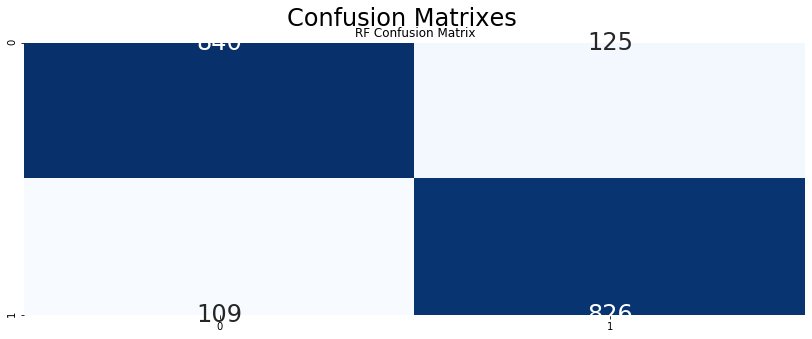

In [70]:
plt.figure(figsize=(14,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_train, finalpred_train[:,1] > optimal_threshold)
plt.title("RF Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

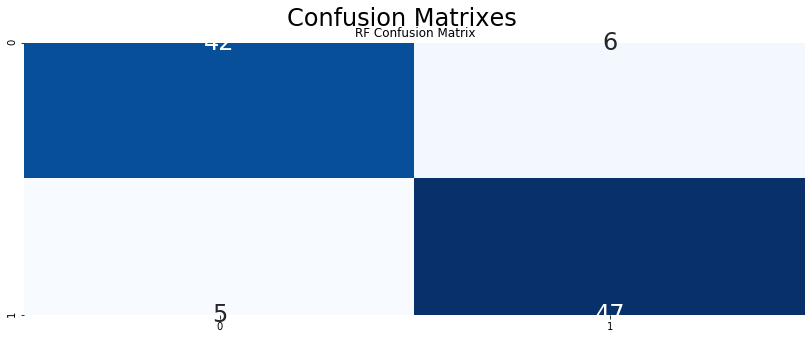

In [71]:
plt.figure(figsize=(14,5))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(2,3,1)
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, finalpred_test[:,1] > optimal_threshold)
plt.title("RF Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## Stacking

In [76]:
from sklearn.datasets import load_iris
from mlxtend.classifier import StackingClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import GradientBoostingClassifier

pipe1 = make_pipeline(ColumnSelector(cols=[0, 1]),
                      GaussianProcessClassifier()
)
pipe2 = make_pipeline(ColumnSelector(cols=list(range(2,18))),
                     RandomForestClassifier(n_jobs=-1, random_state=0,max_depth=7,max_features=3,min_samples_leaf = 4,
 min_samples_split = 12,n_estimators = 100)
)



 
sclf = StackingClassifier(classifiers=[pipe1, pipe2], 
                          meta_classifier=GradientBoostingClassifier()
)

sclf.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[Pipeline(memory=None,
                                         steps=[('columnselector',
                                                 ColumnSelector(cols=[0, 1],
                                                                drop_axis=False)),
                                                ('gaussianprocessclassifier',
                                                 GaussianProcessClassifier(copy_X_train=True,
                                                                           kernel=None,
                                                                           max_iter_predict=100,
                                                                           multi_class='one_vs_rest',
                                                                           n_jobs=None,
                                                                           n_restarts_optimizer=0,
                                

In [77]:
print ("Accuracy Test",accuracy_score(y_test,sclf.predict(X_test)))

Accuracy Test 0.86


Stacking and Ensemble did not work.

## Final Conclusion